# Loan Default Prediction

<img src='loan_default_prediction.jpg' />

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset

dataset = pd.read_csv('Default_Fin.csv')

In [3]:
# First five rows

dataset.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
# Basic Information about Data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
# All the Columns

dataset.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [6]:
# Rows and Columns

dataset.shape

(10000, 5)

In [7]:
# Basic Statistics 

dataset.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [8]:
# Check the Null Value

dataset.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

### Observation
- There is no Null value.

### Q1. Number of people who will be given a grace period of exactly 15 days?

In [11]:
number_of_people_with_grace_period = len(dataset[(dataset["Defaulted?"]==1) & (dataset["Annual Salary"]>100000) & (dataset["Bank Balance"]>5000) & (dataset["Employed"]!=0)])
print(f'Number of People with Grace Period of 15 Days: {number_of_people_with_grace_period}')

Number of People with Grace Period of 15 Days: 206


### Q2. Maximum fine levied by the bank in the period of 15 days

In [12]:
max_balance = dataset["Bank Balance"][(dataset["Defaulted?"]==1) & (dataset["Annual Salary"]>100000) & (dataset["Bank Balance"]>5000)].max()
max_fine = ((2.5* max_balance) * 15)/100
print(f'Maximum Fine: {max_fine}')

Maximum Fine: 11944.44


### Q3. Assuming all the defaulters haven't paid the EMI get grace, total amount of fine generated by the bank

In [13]:
sum=0
for i in dataset.Index:
    if dataset.loc[i-1,'Defaulted?']==0:
        sum+=(2.5*dataset.loc[i-1,'Bank Balance']*15)/100
    
# Rounding off to 4 decimal places
print(f'Total fine amount generated by the Bank: {round(sum,4)}')

Total fine amount generated by the Bank: 34972758.9


In [14]:
# Adding a column of whether Grace Period is given or not

dataset['Grace?'] = ((dataset['Defaulted?']==1) & (dataset['Bank Balance']>5000) & (dataset["Annual Salary"]>100000)).astype(int)

In [15]:
dataset.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,Grace?
0,1,1,8754.36,532339.56,0,0
1,2,0,9806.16,145273.56,0,0
2,3,1,12882.60,381205.68,0,0
3,4,1,6351.00,428453.88,0,0
4,5,1,9427.92,461562.00,0,0


### Q4. Plot to show the difference between the bank balance of people eligible for grace period and the people who aren't.

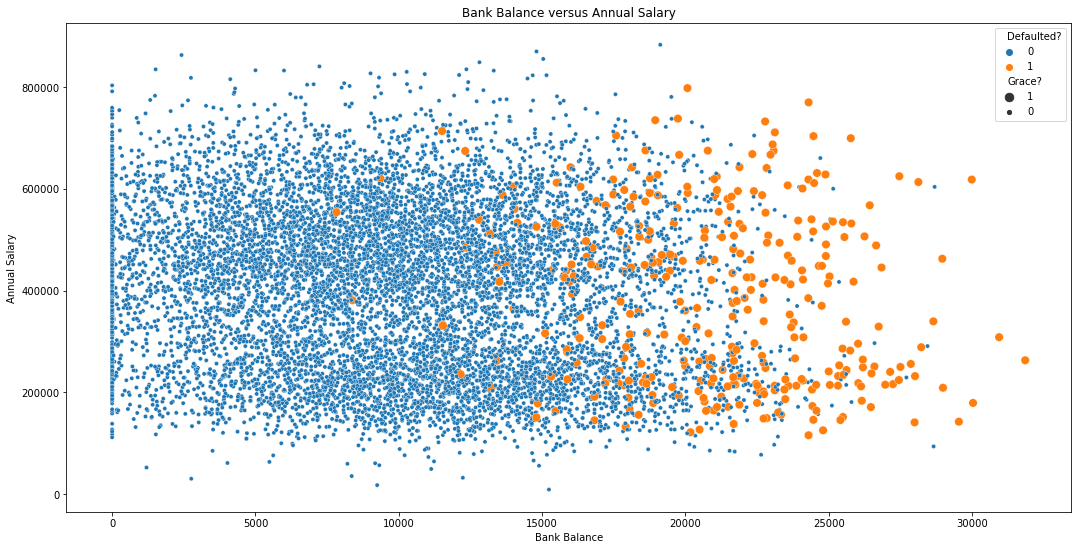

In [16]:
plt.figure(figsize=(18,9))
sns.scatterplot(data=dataset, x='Bank Balance', y='Annual Salary', hue='Defaulted?', hue_order=[0,1], size='Grace?', size_order=[1,0])
plt.title('Bank Balance versus Annual Salary')
plt.show()

## Explaination-

#### 1. People having bank balance greater than 5000, who are defaulted denoted by Orange dots.
#### 2. No of people who are defauled and are not eligible for grace period=0 , denoted by small orange dots.
#### 3. People who are not defaulted are denoted by blue dots.
#### 4. People who are eligible for grace period are denoted by large orange dots

## Conclusion

#### Two points we can conclude from graph clearly -
#### 1. People who have bank balance between 5000 to 15000 , the chances of being defaulted of those people is less than compared to people with bank balance between 15000 to 30000.
#### 2. It is clear from graph that all the people(denoted with large orange dots) who are defaulted are eligible for grace period.

### Q5 Difference in the median of the Bank Balance of people eligible for Grace Period and people who aren't.

In [20]:
Tmedian = dataset["Bank Balance"].median()
Gmedian = dataset["Bank Balance"][(dataset["Annual Salary"]>100000) & (dataset["Bank Balance"]>5000)].median()
difference = Gmedian-Tmedian

# rounding off to 4 decimal places
print(round(difference,4))

1614.42


### Q6 Use a suitable graph to show the changes in the annual income of those people who are eligible for grace period and those who are not.

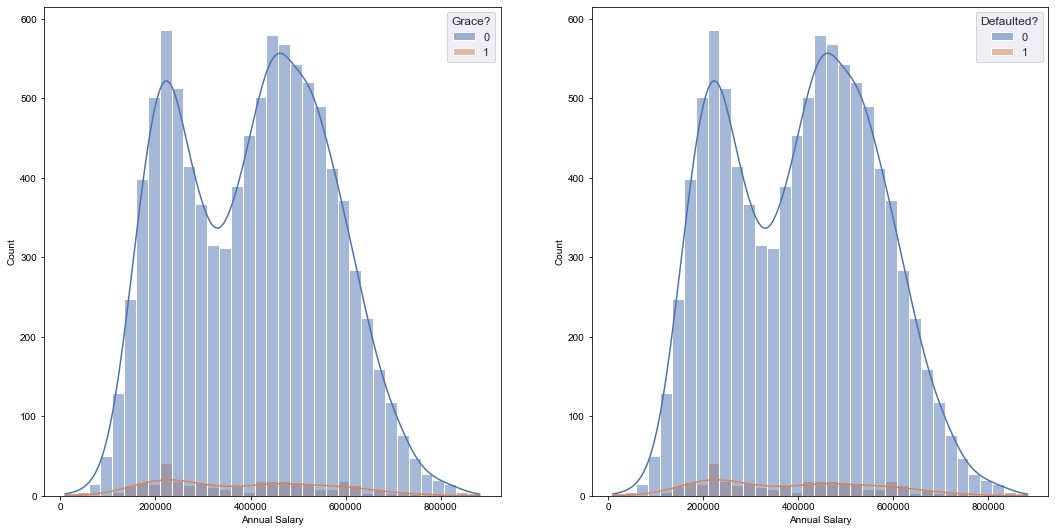

In [17]:
fig, axes = plt.subplots(1,2, figsize=(18,9))
sns.set()
sns.histplot(data=dataset, x="Annual Salary", kde = True, hue = "Grace?", ax=axes[0])
sns.histplot(data=dataset, x="Annual Salary", kde = True, hue = "Defaulted?", ax=axes[1]);

## Explaination

#### 1. From graphs it is clear that both the graphs are same.
#### 2. So, all the people denoted by orange line who are defaulted are eligible for grace period.

## Conclusion-

#### 1. These graphs show that all people with any kind of annual balance are defaulted and they are eligible for grace period.
#### 2. The blue lines are covering mostly all the space of graph , those lines are denoted people who are not defaulted and thus not eligible for grace period. the no of people who are defaulted and eligible for grace period denoted by orange line is less than blue lines.
